In [16]:
import pandas as pd
import re
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'eventsData.xlsx'  # Update with the actual path if necessary
df = pd.read_excel(file_path)

In [5]:
df = df.drop(columns=['ID'])

In [6]:
df.tail(20)

,Event Name,Description,Location,Month
437,Casablanca Urban Sustainability Fair,Highlights eco-urban innovations and sustainab...,Casablanca,January
438,Bahbi,It's a event where we celebrate gnawa's music...,Errachidia,Juin
439,Moussem moulay abdellah amghar,Tbourida,Moulay abdellah,8
440,Moussem Moulay Abdellah Amghar,A vibrant traditional festival that celebrates...,El Jadida,"The festival typically takes place in August, ..."
441,National Festival of Al-Aita,Program related to traditional music (Al-Aita)...,Safi,July
442,Moussem Sidi Said Boughanbour,"An annual event, where you can find people sel...",Safi,April
443,Tbourida of Safi,"Tbourida, also known as Fantasia, is a Morocca...",Safi,August
444,Moussem of Sidi Chachkal,The Moussem of Sidi Chachkal is a spiritual an...,Sidi,April
445,Festival of Sardines,"Safi, known as one of Morocco's key fishing hu...",Safi,July
446,National Festival of Popular Arts,The National Festival of Popular Arts is one o...,Marrakech,July


In [8]:
def extract_month(text):
    months = {month: index for index, month in enumerate(calendar.month_name) if month}
    short_months = {month: index for index, month in enumerate(calendar.month_abbr) if month}
    
    # Check for full month names
    for month in months:
        if month.lower() in text.lower():
            return month
    
    # Check for numeric month and convert it
    match = re.search(r'\b(1[0-2]|[1-9])\b', text)
    if match:
        numeric_month = int(match.group())
        return calendar.month_name[numeric_month]
    
    return None

In [9]:
# Apply cleaning to the 'Month' column
df['Month'] = df['Month'].fillna('')  # Replace NaN with empty strings
df['Month'] = df['Month'].apply(lambda x: extract_month(str(x)))

In [10]:
df_cleaned = df.dropna(subset=['Month'])

In [11]:
df_cleaned = df_cleaned.drop_duplicates()



In [13]:
df_cleaned.tail(20)

,Event Name,Description,Location,Month
436,Fes Literary Heritage Week,Explores Morocco's rich literary history.,Fes,September
437,Casablanca Urban Sustainability Fair,Highlights eco-urban innovations and sustainab...,Casablanca,January
439,Moussem moulay abdellah amghar,Tbourida,Moulay abdellah,August
440,Moussem Moulay Abdellah Amghar,A vibrant traditional festival that celebrates...,El Jadida,May
441,National Festival of Al-Aita,Program related to traditional music (Al-Aita)...,Safi,July
442,Moussem Sidi Said Boughanbour,"An annual event, where you can find people sel...",Safi,April
443,Tbourida of Safi,"Tbourida, also known as Fantasia, is a Morocca...",Safi,August
444,Moussem of Sidi Chachkal,The Moussem of Sidi Chachkal is a spiritual an...,Sidi,April
445,Festival of Sardines,"Safi, known as one of Morocco's key fishing hu...",Safi,July
446,National Festival of Popular Arts,The National Festival of Popular Arts is one o...,Marrakech,July


In [14]:
df_cleaned.head(5)

,Event Name,Description,Location,Month
0,Mawazine Festival,"One of the world's largest music festivals, fe...",Rabat,June
1,Fes Festival of World Sacred Music,Celebrates spiritual music from various cultur...,Fes,May
2,Gnaoua World Music Festival,"Showcases Gnaoua music alongside jazz, pop, an...",Essaouira,June
3,Timitar Festival,Focuses on Amazigh (Berber) music and world mu...,Agadir,July
4,Tan-Tan Moussem,Annual gathering of Saharan tribes featuring t...,Tan-Tan,December


C:\Users\user\AppData\Local\Temp\ipykernel_19980\2959941072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")


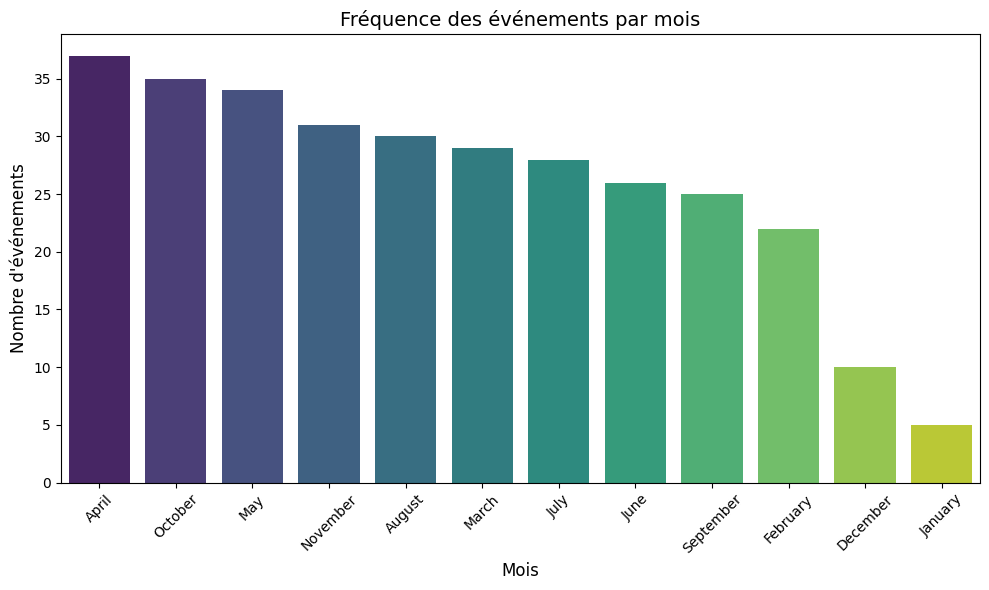

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

month_counts = df_cleaned['Month'].value_counts()

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")
plt.title('Fréquence des événements par mois', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre d\'événements', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('frequence_par_mois.png')  # Sauvegarde du graphique
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19980\1605791779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


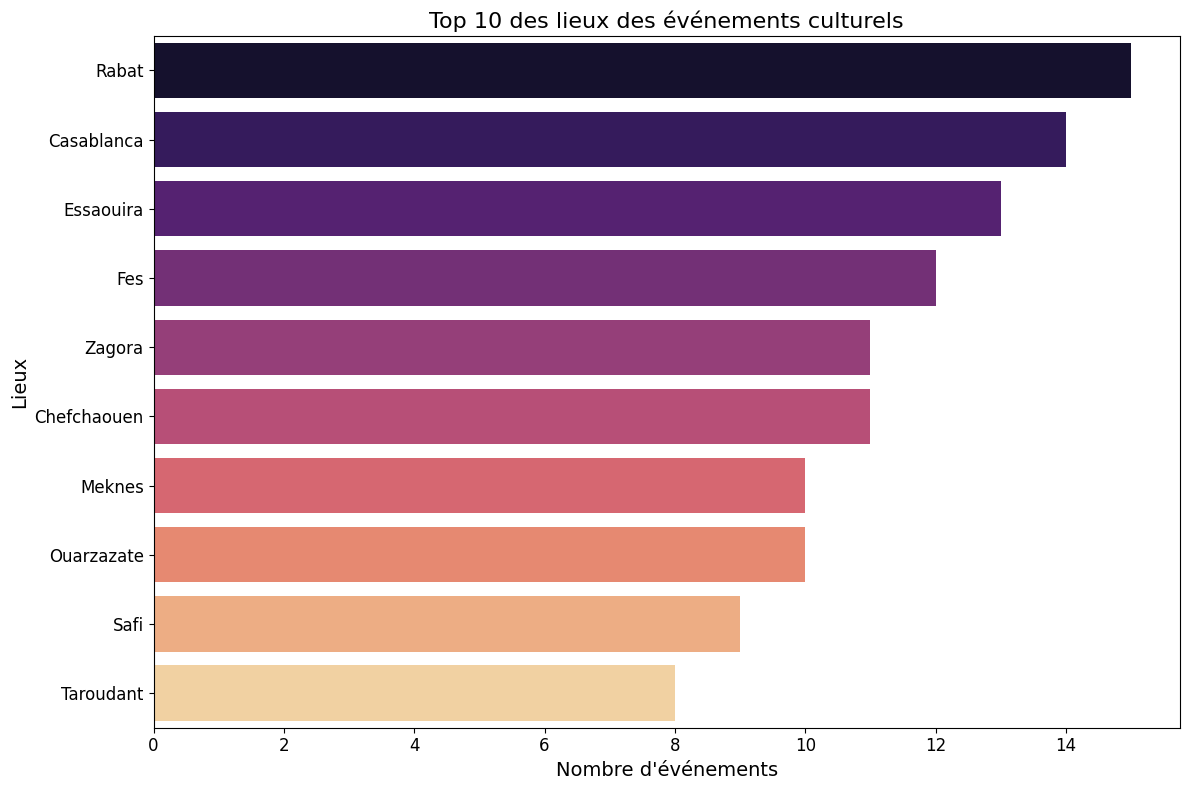

In [21]:
# Compter le nombre d'événements par lieu
location_counts = df_cleaned['Location'].value_counts()

# Sélectionner les 10 lieux les plus fréquents
top_locations = location_counts.head(10)

# Créer le graphique
plt.figure(figsize=(12, 8))  # Taille de la figure ajustée pour plus de clarté
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title('Top 10 des lieux des événements culturels', fontsize=16)
plt.xlabel("Nombre d'événements", fontsize=14)
plt.ylabel('Lieux', fontsize=14)

# Ajuster les étiquettes des axes pour éviter le chevauchement
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('top_locations_events.png')  # Sauvegarder le graphique
plt.show()